<a href="https://colab.research.google.com/github/JonathanCecil01/OfficePlacementM7/blob/main/RFIS_TimeRange_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import math
import csv
from copy import deepcopy
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers

Reading data for training 

In [2]:
def read_data():
    landmarks = []
    with open('/content/drive/MyDrive/Colab Notebooks/Active_Landmarks.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            landmarks.append(row)
    file.close()
    for landmark in landmarks:
        landmark[1] = float(landmark[1])
        landmark[2] = float(landmark[2])
    start = landmarks[0][2]
    products = []


    with open('/content/drive/MyDrive/Colab Notebooks/Products.csv', 'r') as file1:
        reader = csv.reader(file1)
        for row in reader:
            products.append(row) 
    for product in products:
        product[2] = float(product[2])
        product[3] = float(product[3])
        product[2] = float("{:.0f}".format(product[2]))
        product[3] = float("{:.0f}".format(product[3]))
    
    return [products, landmarks]

In [3]:
class Product:
  def __init__(self, item_id, product_id):
    self.item_id = item_id
    self.product_id = product_id
    self.rssi = []
    self.timestamps = []

Organising Data into a Dictionary


In [4]:
data = read_data()
products = data[0]
landmarks = data[1]

Getting Top ten Timestamps

In [5]:
unique_list = list(set(tuple(inner_list) for inner_list in landmarks))

unique_list_of_lists = [list(inner_tuple) for inner_tuple in unique_list]

landmarks = unique_list_of_lists

In [6]:
unique_list = list(set(tuple(inner_list) for inner_list in products))

unique_list_of_lists = [list(inner_tuple) for inner_tuple in unique_list]

products = unique_list_of_lists

In [7]:
product_dict = {}
for i in products:
  product_dict[i[0]] = []
for i in products:
  product_dict[i[0]].append(i)

for key in product_dict.keys():
  product_dict[key].sort(key=lambda x: -x[2])

for key in product_dict.keys():
  product_dict[key] = product_dict[key][:int(len(product_dict[key])/10)]
print(product_dict)

{'65': [['65', 'P22', -68.0, 22435.0, 'L5'], ['65', 'P22', -68.0, 22465.0, 'L5'], ['65', 'P22', -68.0, 22582.0, 'L5'], ['65', 'P22', -68.0, 22472.0, 'L5'], ['65', 'P22', -68.0, 22240.0, 'L5'], ['65', 'P22', -68.0, 22619.0, 'L5'], ['65', 'P22', -68.0, 22387.0, 'L5'], ['65', 'P22', -68.0, 22521.0, 'L5'], ['65', 'P22', -68.0, 22204.0, 'L5'], ['65', 'P22', -68.0, 22588.0, 'L5'], ['65', 'P22', -68.0, 22503.0, 'L5'], ['65', 'P22', -68.0, 22216.0, 'L5'], ['65', 'P22', -68.0, 22565.0, 'L5'], ['65', 'P22', -68.0, 22303.0, 'L5'], ['65', 'P22', -68.0, 22572.0, 'L5'], ['65', 'P22', -68.0, 22255.0, 'L5'], ['65', 'P22', -68.0, 22285.0, 'L5'], ['65', 'P22', -68.0, 22449.0, 'L5'], ['65', 'P22', -68.0, 22249.0, 'L5'], ['65', 'P22', -68.0, 22456.0, 'L5'], ['65', 'P22', -68.0, 22603.0, 'L5'], ['65', 'P22', -68.0, 22518.0, 'L5'], ['65', 'P22', -68.0, 22201.0, 'L5'], ['65', 'P22', -68.0, 22365.0, 'L5'], ['65', 'P22', -68.0, 22372.0, 'L5'], ['65', 'P22', -68.0, 22402.0, 'L5'], ['65', 'P22', -68.0, 22432.0, 

In [8]:
landmark_dict = {}
landmarks.sort(key = lambda x: x[2])
for landmark in landmarks:
  landmark_dict[str(landmark[2])] = []

for landmark in landmarks:
  landmark_dict[str(landmark[2])].append(landmark)

for key in landmark_dict.keys():
  labels = {}
  if len(landmark_dict[key])>=8:
    for i in landmark_dict[key]:
      labels[i[0]] = -91
    for i in landmark_dict[key]:
      if i[1]>labels[i[0]]:
        labels[i[0]] = i[1]
    landmark_dict[key] = [[k, labels[k], key] for k in labels.keys()]
    

print(landmark_dict)

{'80.986': [['L1', -91, '80.986'], ['L2', -91, '80.986'], ['L3', -91, '80.986'], ['L4', -91, '80.986'], ['L5', -91, '80.986'], ['L0', -91, '80.986'], ['L6', -91, '80.986'], ['L7', -91, '80.986']], '84.091': [['L3', -91, '84.091'], ['L5', -91, '84.091'], ['L4', -91, '84.091'], ['L0', -91, '84.091'], ['L6', -91, '84.091'], ['L7', -91, '84.091'], ['L2', -91, '84.091'], ['L1', -91, '84.091']], '87.24': [['L5', -91, '87.24'], ['L4', -91, '87.24'], ['L6', -91, '87.24'], ['L7', -91, '87.24'], ['L0', -91, '87.24'], ['L1', -91, '87.24'], ['L2', -91, '87.24'], ['L3', -91, '87.24']], '90.223': [['L6', -91, '90.223'], ['L7', -91, '90.223'], ['L0', -91, '90.223'], ['L1', -91, '90.223'], ['L2', -91, '90.223'], ['L3', -91, '90.223'], ['L4', -91, '90.223'], ['L5', -91, '90.223']], '92.859': [['L3', -91, '92.859'], ['L5', -91, '92.859'], ['L4', -91, '92.859'], ['L6', -91, '92.859'], ['L7', -91, '92.859'], ['L0', -91, '92.859'], ['L1', -91, '92.859'], ['L2', -91, '92.859']], '95.374': [['L3', -91, '95.3

In [9]:
time_dict = {}

for key, values in product_dict.items():
    time_dict[key] = {}
    for inner_list in values:
        timestamp = inner_list[3]
        rssi = inner_list[2]
        predicted_landmark = inner_list[-1]
        time_dict[key][str(timestamp)] = [rssi, predicted_landmark, []]
        for key2 in landmark_dict:
            landmark_timestamp = float(key2)
            time_difference = abs(landmark_timestamp - timestamp)

            if time_difference <= 200:
                time_dict[key][str(timestamp)][2].append(landmark_dict[key2])

In [11]:
inputs = []
outputs = []
for id in time_dict.keys():
  for time in time_dict[id].keys():
    for i in time_dict[id][time][2]:
      i.sort(key = lambda x: x[0])
      input = [x[1] for x in i]
      input.append(time_dict[id][time][0])
      inputs.append(input)
      output = [0]*8
      output[int(time_dict[id][time][1][-1])] = 1
      outputs.append(output)
print(len(outputs))
print(inputs[7647], outputs[7647])

439422
[-55.64949357461536, -55.64949357461536, -91, -91, -91, -91, -91, -91, -64.0] [0, 1, 0, 0, 0, 0, 0, 0]


SHUFFLE the input output pair


In [12]:
inputs = np.array(inputs)
outputs = np.array(outputs)
# inputs = np.random.shuffle(inputs)
# outputs = np.random.shuffle(outputs)
temp = []
for i in range(0, len(outputs)):
  temp.append([inputs[i], outputs[i]])
print(temp[1])
np.random.shuffle(temp)
print(temp[1])
inputs = []
outputs = []
for i in temp:
  inputs.append(i[0])
  outputs.append(i[1])
inputs = np.array(inputs)
outputs = np.array(outputs)

[array([-91.        , -91.        , -91.        , -91.        ,
       -91.        , -55.64949357, -55.64949357, -91.        ,
       -68.        ]), array([0, 0, 0, 0, 0, 1, 0, 0])]
[array([-46.09437912, -91.        , -91.        , -91.        ,
       -91.        , -91.        , -91.        , -91.        ,
       -60.        ]), array([1, 0, 0, 0, 0, 0, 0, 0])]


In [13]:
print(len(inputs), len(outputs))

439422 439422


In [14]:
x_train = inputs[:400000]
x_test = inputs[400000:]
y_train = outputs[:400000]
y_test = outputs[400000:]

In [15]:
model = keras.Sequential([
    layers.Dense(150, activation='sigmoid', input_shape=(9,)),
    layers.Dense(150, activation='sigmoid'),
    layers.Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, batch_size=10000, epochs=1000, validation_split = 0.2)

In [19]:
model.evaluate(x_test, y_test)

1232/1232 [==============================] - 3s 2ms/step - loss: 0.0826 - accuracy: 0.9699


[0.08263558149337769, 0.9698899388313293]

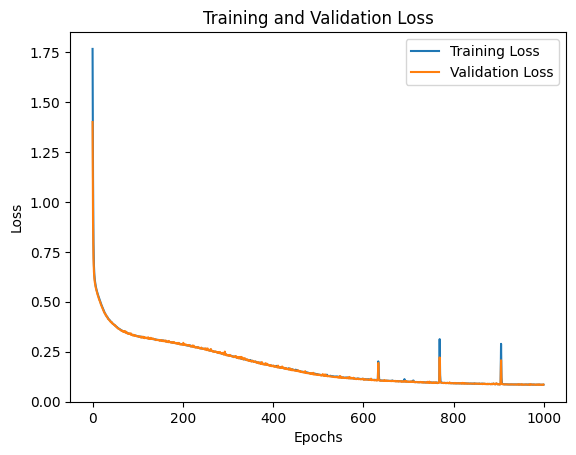

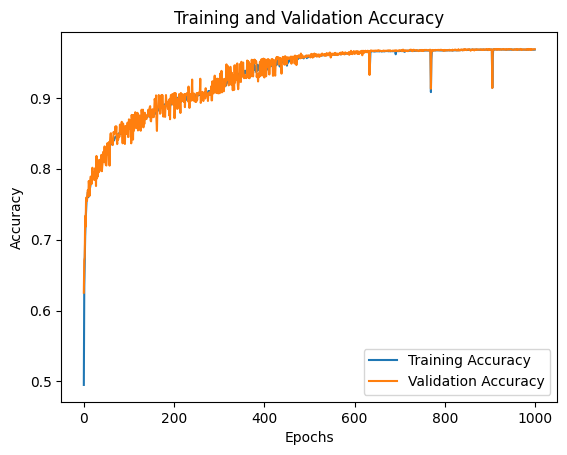

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()